In [1]:
import numpy as np
import matplotlib.pyplot as plt

{'a_0': 0.7871602402091145,
 'a_1': -0.8323209964538704,
 'a_2': 0.21564629117148226,
 'a_3': 0.881613286074371,
 'a_4': 0.8171583589801164,
 'a_5': 0.20956132600918664,
 'a_6': -1.260715885019615,
 'a_7': -0.954900543133692,
 'a_8': -0.7118231246880576,
 'a_9': 0.2442160588890633}

Optimal action : a_3, optimal reward : 0.881613286074371


In [21]:
def epsilon_greedy(epsilon, arm_list, init_val, trials, optimal_action, true_action_values):
      n_optimal_actions = np.zeros(trials)
      q_val = {arm:init_val for arm in arm_list}
      n_action ={arm:0 for arm in arm_list}

      for i in range(trials):
            
            # print(q_val)
            greedy_action = max(q_val, key = lambda x : q_val[x])
            action_selection = np.random.choice([greedy_action]+arm_list, p = [1-epsilon]+[epsilon/len(arm_list) for _ in range(len(arm_list))])
            
            reward_obtained = np.random.normal(true_action_values[action_selection], 1)

            # print(action_selection, reward_obtained)

            q_val[action_selection] = q_val[action_selection] + (1/max(1, n_action[action_selection]))*( reward_obtained - q_val[action_selection])

            if action_selection == optimal_action:
                  n_optimal_actions[i] = 1
      return n_optimal_actions

In [22]:
def m_bandits(n_bandits, epsilon, init_val, trials):
      history = np.zeros((n_bandits, trials))
      for i in range(n_bandits):

            rewards = np.random.normal(0, 1, 10)
            true_action_values = {f'a_{i}':rewards[i] for i in range(10)}

            optimal_action = max(true_action_values, key = lambda x : true_action_values[x])

            history[i] = np.array(epsilon_greedy(epsilon, list(true_action_values.keys()), init_val, trials, optimal_action, true_action_values))
      return history
            

            

In [34]:
history = m_bandits(100, 0, -5, 100)

In [35]:
history = history.sum(axis = 0)

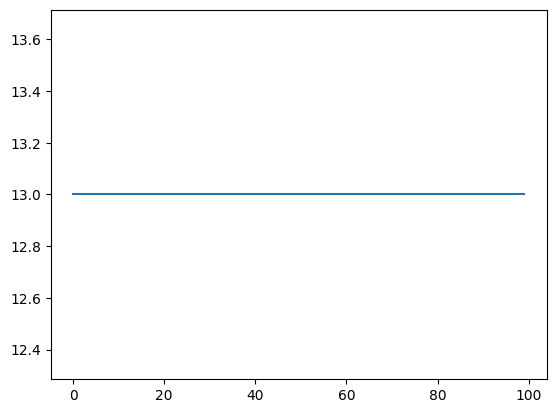

In [36]:
plt.plot(range(len(history)), history)

In [37]:
experiments = {'init_val':[0, 5, -5], 'epsilon':[0, 0.1, 0.01]}

full_history = {}

for val in experiments['init_val']:
      for eps in experiments['epsilon']:
            full_history[f'{val},{eps}'] = m_bandits(1000, eps, val, 1000).sum(axis = 0)

Text(0.5, 1.0, 'Plot and Pravachan')

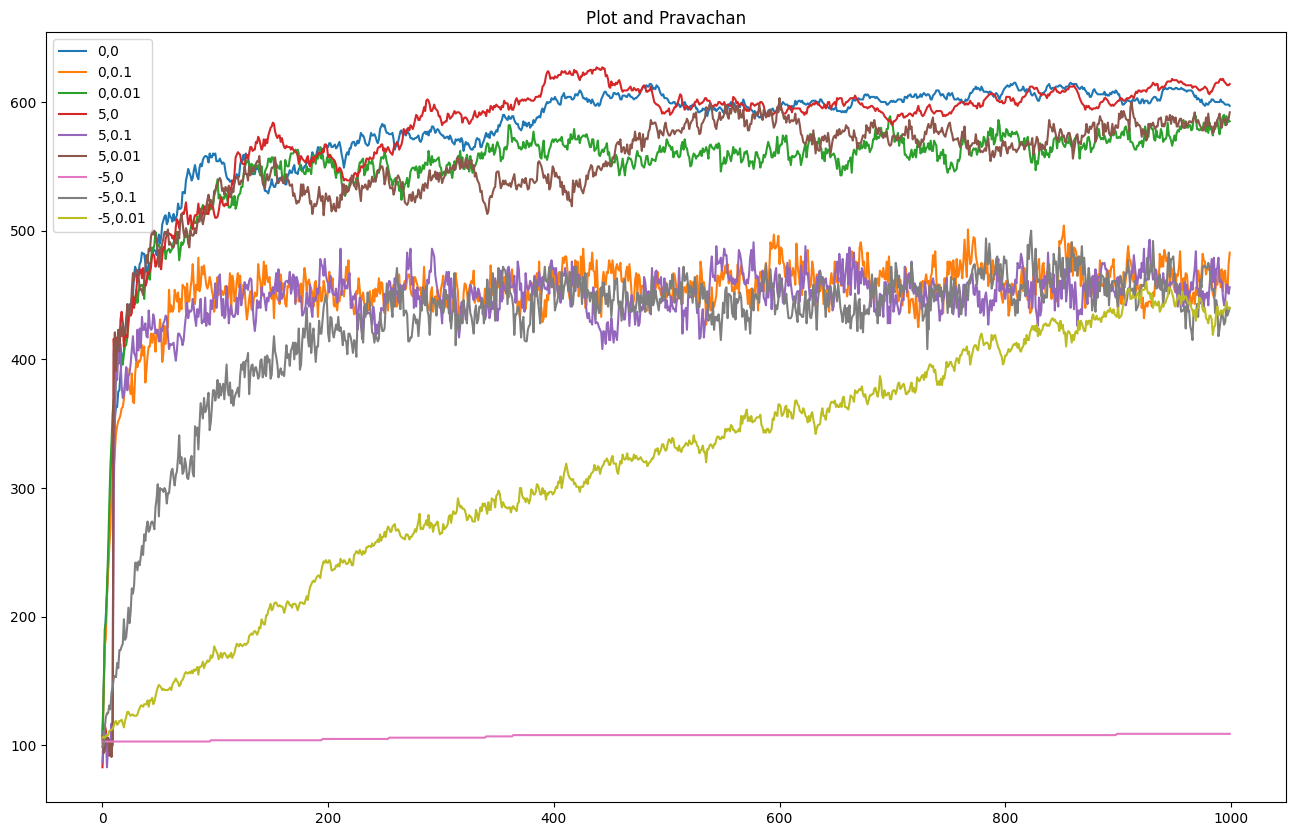

In [45]:
plt.figure(figsize = (16, 10))
for key in list(full_history.keys()):
      plt.plot(range(1000), full_history[key], label = f'{key}')
plt.legend()
plt.title('Plot and Pravachan')